## Muli-class classification

### Check for GPU

In [1]:
!nvidia-smi

Sat Dec  9 08:25:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Load in the data

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# data already in training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Checking the samples
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [5]:
# Checking the shape of the data
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
# Max and min value of a sample of data
train_data.min(), train_data.max()

(0, 255)

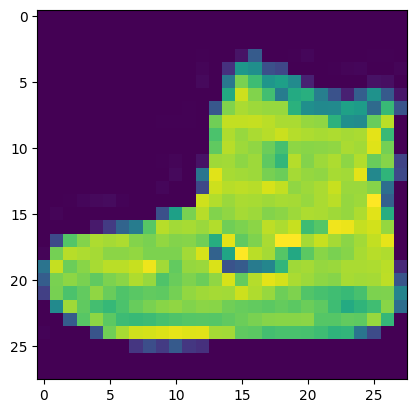

In [6]:
# Plot the image
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);


In [7]:
# Getting the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
# Get random images
import random
def plot_random_image(train_data, train_labels):
  plt.figure(figsize=(7,7))
  for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

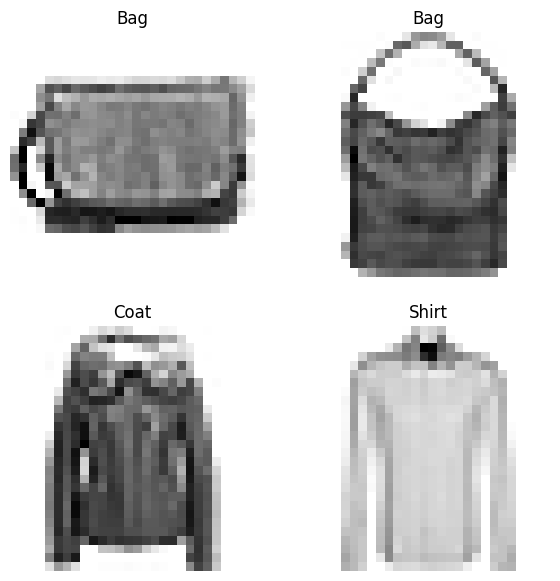

In [15]:
plot_random_image(train_data, train_labels)

In [16]:
train_data[0].shape

(28, 28)

#### Model 0: Baseline model

In [18]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [26]:
train_data.shape, train_data[0].shape

((60000, 28, 28), (28, 28))

In [27]:
len(class_names)

10

In [28]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_0 = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(20, activation = 'relu'),
    layers.Dense(len(class_names), activation = 'softmax'),
], name = 'model_0')

# Compile the model
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
model_0_history = model_0.fit(train_data,
                              train_labels,
                              epochs = 25,
                              validation_data = (test_data, test_labels))

Epoch 1/25
1875/1875 [==============================] - 11s 3ms/step - loss: 1.8415 - accuracy: 0.5498 - val_loss: 1.0018 - val_accuracy: 0.6518
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8911 - accuracy: 0.6587 - val_loss: 0.8055 - val_accuracy: 0.6984
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7521 - accuracy: 0.7003 - val_loss: 0.8742 - val_accuracy: 0.6569
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7085 - accuracy: 0.7108 - val_loss: 0.7047 - val_accuracy: 0.7220
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6664 - accuracy: 0.7256 - val_loss: 0.6814 - val_accuracy: 0.7158
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6270 - accuracy: 0.7383 - val_loss: 0.6468 - val_accuracy: 0.7287
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5999 - accuracy: 0.7497 - val_loss: 0.6313 - val_accuracy

In [29]:
model_0.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.8506


[0.49076148867607117, 0.850600004196167]

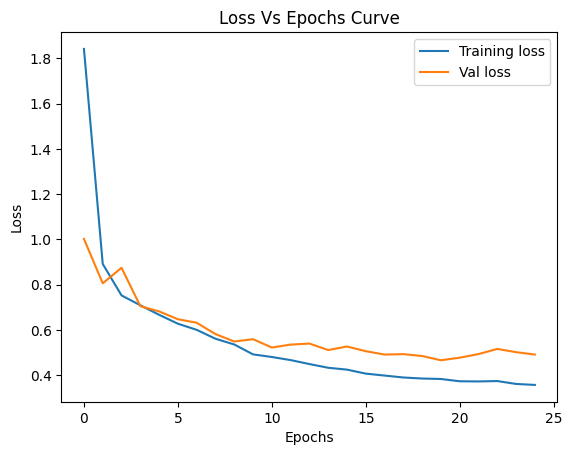

In [33]:
# Plot loss curves of the model
import matplotlib.pyplot as plt
plt.plot(model_0_history.history['loss'], label='Training loss')
plt.plot(model_0_history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs Curve')
plt.legend();

In [50]:
# Make a function to plot loss curves
def plot_loss_curves(history,
                     metrics_to_plot = ['loss', 'accuracy']):
  plt.figure(figsize=(9,9))
  for index, metric in enumerate(metrics_to_plot):
    ax = plt.subplot(2,1, index + 1)
    plt.plot(history.history[metric], label = f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label = f'Val {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.title(f'{metric} Vs Epochs curve')
    plt.subplots_adjust(hspace=0.6)
    plt.grid(True)
    plt.legend();

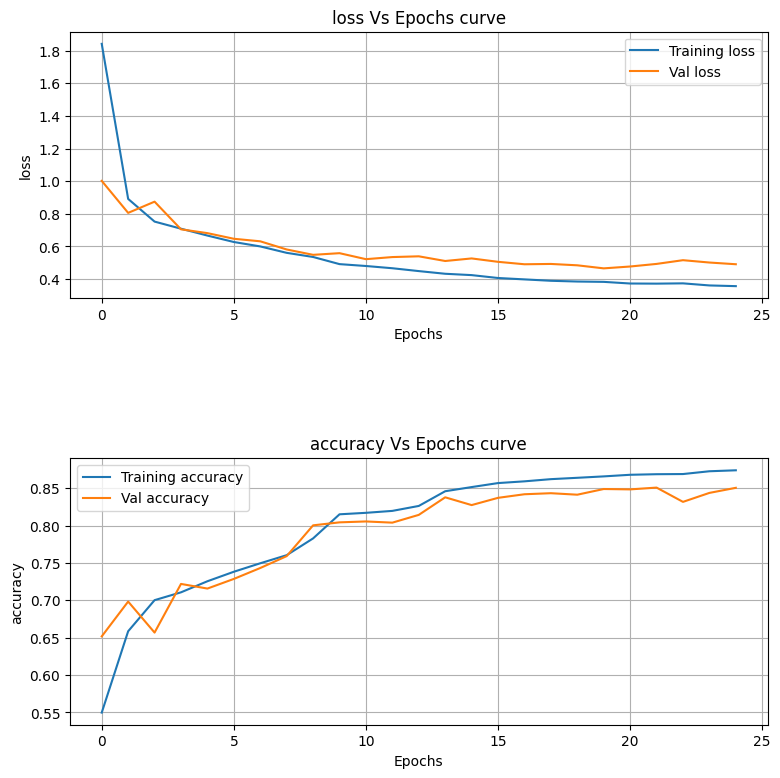

In [51]:
plot_loss_curves(model_0_history)

In [61]:
# Make predictions using the model
model_0_pred_probs = model_0.predict(test_data)
model_0_pred_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[9.1142046e-13, 1.3563377e-27, 6.8015954e-28, 1.9370648e-17,
        2.4177359e-30, 9.8380512e-03, 1.7425777e-17, 7.5435638e-02,
        2.6942351e-10, 9.1472626e-01],
       [1.7541451e-03, 5.0022120e-08, 9.8141611e-01, 8.8941370e-04,
        1.3619565e-03, 3.0588493e-10, 1.3753463e-02, 1.0984894e-28,
        8.2489062e-04, 4.7381344e-22],
       [7.9148975e-08, 9.9999094e-01, 3.2840942e-27, 8.7948556e-06,
        3.8652345e-23, 1.2040222e-07, 4.5347233e-13, 7.7651870e-23,
        3.5067668e-15, 3.3389354e-24],
       [3.8618086e-07, 9.9994671e-01, 6.7393160e-24, 5.2656815e-05,
        3.7504007e-20, 2.0812364e-07, 1.4639357e-11, 1.4965968e-24,
        1.4986906e-13, 1.8169723e-23],
       [7.6271042e-02, 8.5070375e-03, 7.9895891e-02, 3.7301280e-02,
        4.9557310e-02, 4.8480094e-03, 7.3805016e-01, 1.3738050e-03,
        3.9258078e-03, 2.6963942e-04]], dtype=float32)

In [62]:
model_0_pred_probs[0]

array([9.1142046e-13, 1.3563377e-27, 6.8015954e-28, 1.9370648e-17,
       2.4177359e-30, 9.8380512e-03, 1.7425777e-17, 7.5435638e-02,
       2.6942351e-10, 9.1472626e-01], dtype=float32)

In [63]:
# Convert the probability prediction into prediction labels
model_0_preds = model_0_pred_probs.argmax(axis=1)
model_0_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [66]:
# Making a classification matrix
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

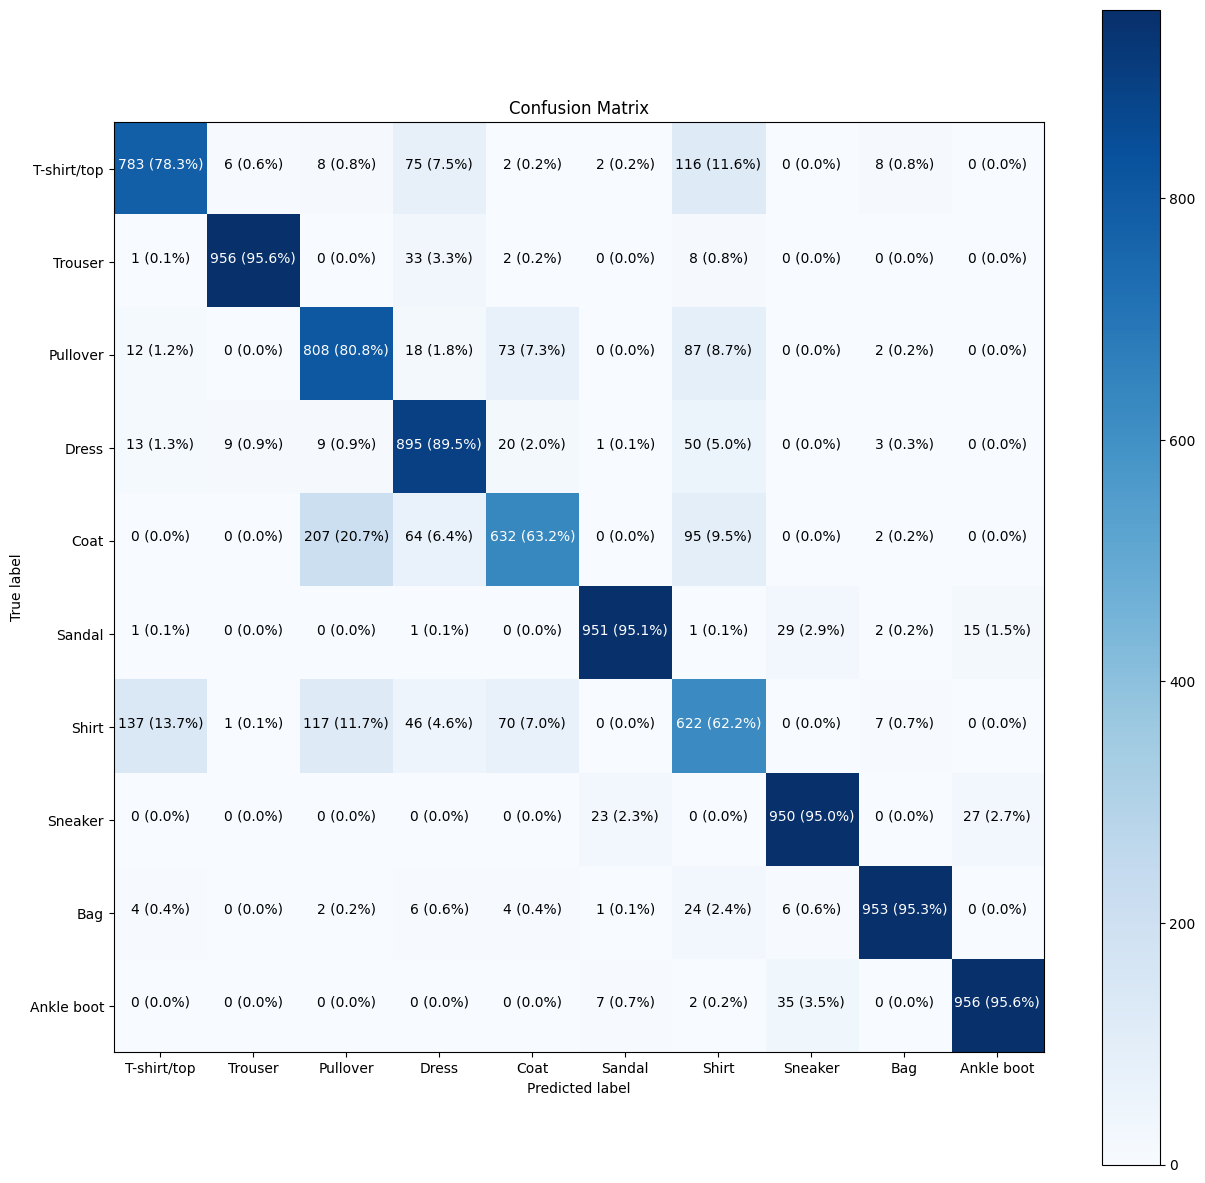

In [68]:
# Make a prettier confusion matrix
import numpy as np
make_confusion_matrix(y_true=test_labels,
                      y_pred=model_0_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [76]:
# Get the classification report
from sklearn.metrics import classification_report
print(classification_report(y_true = test_labels,
                      y_pred = model_0_preds,
                      target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.78      0.80      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.70      0.81      0.75      1000
       Dress       0.79      0.90      0.84      1000
        Coat       0.79      0.63      0.70      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.62      0.62      0.62      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.98      0.95      0.96      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [82]:
model_0_preds, test_labels

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

#### Model 1: Same model, but trained on normalised data

In [84]:
train_data.min(), train_data.max()

(0, 255)

In [85]:
# Make normalised data
train_data = train_data / 255.0
test_data = test_data / 255.0

In [87]:
# Create the model
model_1 = tf.keras.models.clone_model(model_0)

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
model_1_history = model_1.fit(train_data, train_labels,
                              epochs = 25,
                              validation_data = (test_data, test_labels))

Epoch 1/25
1875/1875 [==============================] - 12s 5ms/step - loss: 0.5603 - accuracy: 0.8061 - val_loss: 0.4651 - val_accuracy: 0.8353
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4075 - accuracy: 0.8555 - val_loss: 0.4700 - val_accuracy: 0.8393
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3711 - accuracy: 0.8677 - val_loss: 0.4047 - val_accuracy: 0.8532
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3473 - accuracy: 0.8749 - val_loss: 0.3967 - val_accuracy: 0.8557
Epoch 5/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3305 - accuracy: 0.8792 - val_loss: 0.3995 - val_accuracy: 0.8515
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3142 - accuracy: 0.8858 - val_loss: 0.4034 - val_accuracy: 0.8518
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3055 - accuracy: 0.8890 - val_loss: 0.4092 - val_accurac

In [88]:
model_1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8786


[0.3804685175418854, 0.878600001335144]

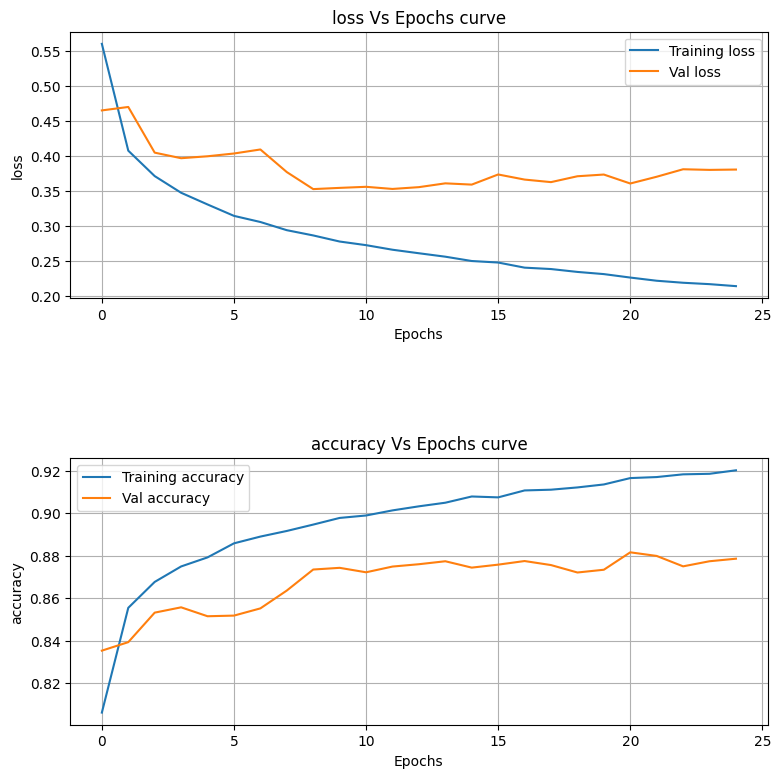

In [90]:
# Plot the loss curves
plot_loss_curves(model_1_history)

In [89]:
# Making predictions using the model
model_1_pred_probs = model_1.predict(test_data)
model_1_pred_probs[:10]

313/313 [==============================] - 1s 2ms/step


array([[2.24563729e-10, 5.71184506e-12, 2.07220546e-14, 2.73531214e-06,
        1.10173199e-12, 8.04060779e-04, 5.83090412e-08, 1.13597531e-02,
        4.69646186e-13, 9.87833381e-01],
       [7.29912281e-05, 7.97938873e-20, 9.99506116e-01, 8.36270442e-10,
        2.63572932e-04, 2.00045713e-09, 1.57273767e-04, 2.48244160e-15,
        3.71613677e-12, 3.77342040e-15],
       [3.36606611e-12, 1.00000000e+00, 1.03935856e-17, 5.35250490e-11,
        1.20115879e-11, 6.34240487e-18, 7.92845715e-13, 1.80408408e-31,
        1.34308255e-23, 5.14639641e-25],
       [8.88650473e-11, 9.99999642e-01, 1.01891023e-15, 3.60872178e-07,
        3.69737707e-09, 7.39624426e-15, 5.79744551e-11, 2.64591639e-24,
        1.04710138e-19, 2.16301875e-19],
       [1.65112495e-01, 1.98486759e-06, 4.23326530e-03, 7.26105354e-04,
        4.61414107e-04, 7.15159931e-10, 8.29464614e-01, 3.38735384e-16,
        1.54384423e-07, 1.61183198e-12],
       [5.02794251e-08, 9.99999881e-01, 2.15924414e-11, 1.69628656e-09,
   

In [91]:
# Convert the prediction probabilities to prediction labels
model_1_preds = model_1_pred_probs.argmax(axis = -1)
model_1_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [92]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

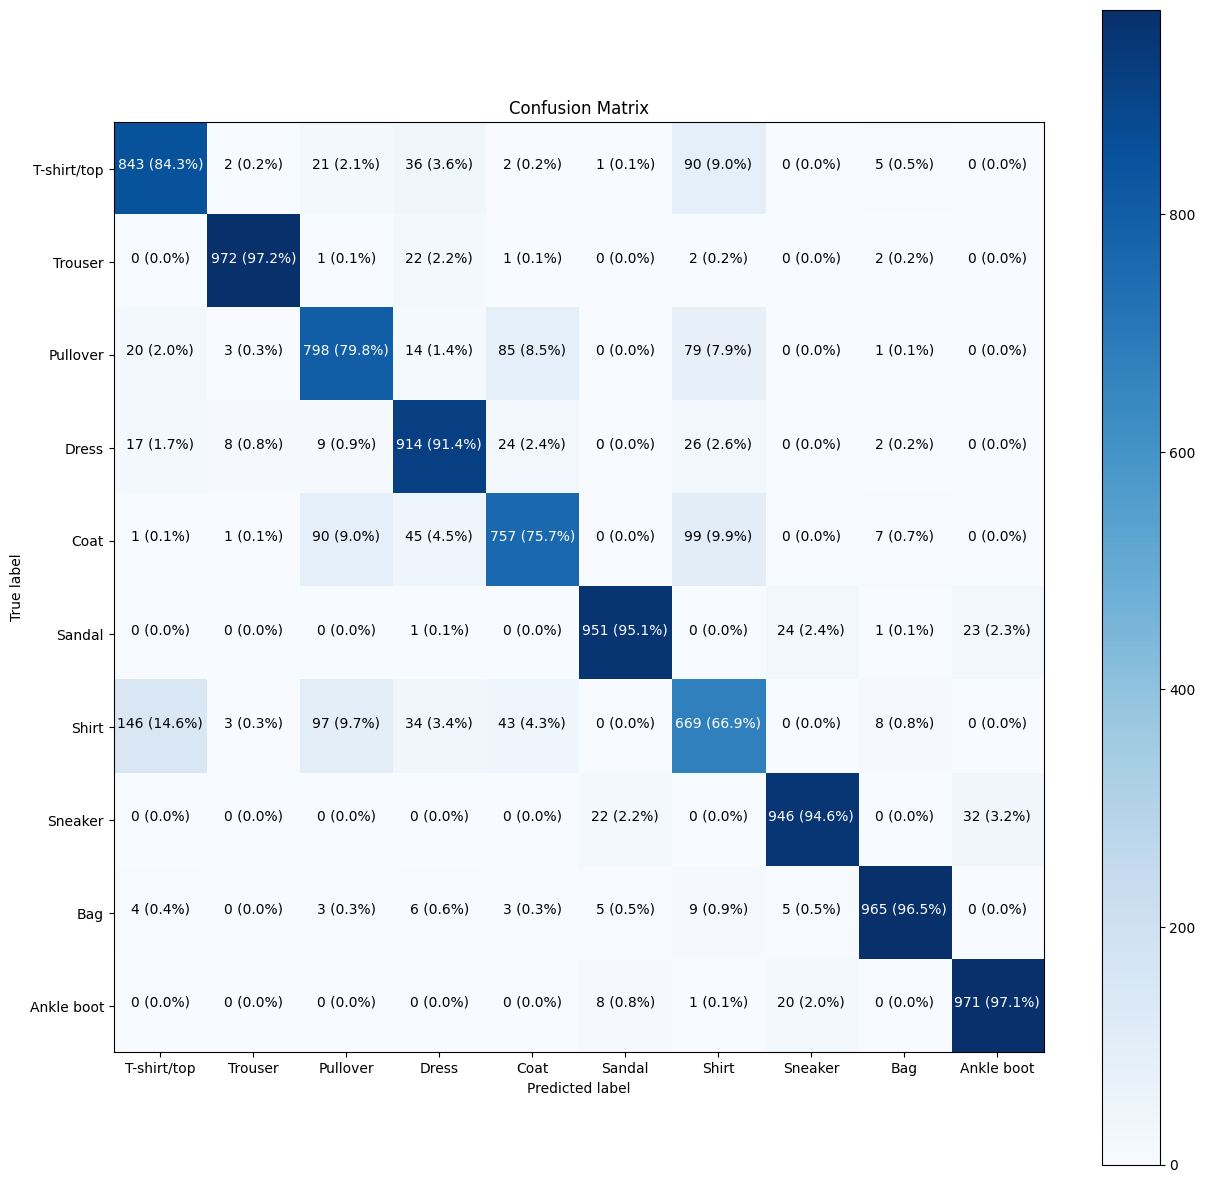

In [93]:
# Make the classifaction matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=model_1_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [96]:
print(classification_report(y_true = test_labels,
                      y_pred = model_1_preds,
                      target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.84      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.78      0.80      0.79      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.83      0.76      0.79      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.69      0.67      0.68      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [114]:
# Plotting and checking the predictions made by the model
import random
def plot_pred_images(y_preds, test_data, test_labels, class_names):
  plt.figure(figsize=(10, 10))
  col = 'r'
  for index in range(4):
    ax = plt.subplot(2, 2, index + 1)
    rand_index = random.choice(range(len(y_preds)))
    pred_class = class_names[y_preds[rand_index]]
    actual_class = class_names[test_labels[rand_index]]

    plt.imshow(test_data[rand_index], cmap=plt.cm.binary)

    if pred_class == actual_class:
      col = 'g'
    else:
      col = 'r'

    plt.title(f'Predicted: {pred_class}; Actual: {actual_class}',
              color = col)
    plt.axis(False);

In [115]:
model_1_preds

array([9, 2, 1, ..., 8, 1, 5])

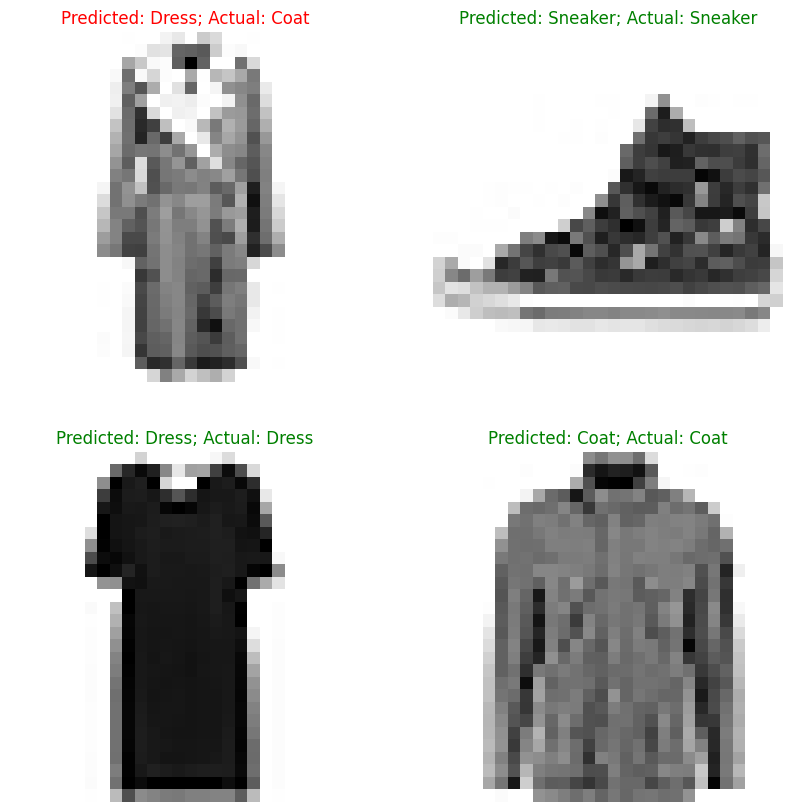

In [119]:
plot_pred_images(model_1_preds,
                 test_data, test_labels,
                 class_names)

#### Model 2: Making a bigger model, with more layers, and prefetching the data

In [138]:
train_data_pf = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_data_pf = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [139]:
train_data_pf

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [140]:
it = iter(train_data_pf)
next(it)

(<tf.Tensor: shape=(32, 28, 28), dtype=float64, numpy=
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ...

In [144]:
# setting the random seed
tf.random.set_seed(42)

# Create the model
model_2 = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(len(class_names), activation = 'softmax'),
], name = 'model_2')

# Compile the model
model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

In [142]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 32)                25120     
                                                                 
 dense_39 (Dense)            (None, 64)                2112      
                                                                 
 dense_40 (Dense)            (None, 128)               8320      
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dense_43 (Dense)            (None, 32)                2080

In [145]:
# Fit the model (on normal data)
model_2_history = model_2.f@it(train_data, train_labels,
                              epochs = 25,
                              validation_data = (test_data, test_labels))

Epoch 1/25
1875/1875 [==============================] - 14s 6ms/step - loss: 0.6809 - accuracy: 0.7653 - val_loss: 0.4748 - val_accuracy: 0.8359
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4185 - accuracy: 0.8517 - val_loss: 0.4461 - val_accuracy: 0.8455
Epoch 3/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3790 - accuracy: 0.8642 - val_loss: 0.4053 - val_accuracy: 0.8550
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3546 - accuracy: 0.8723 - val_loss: 0.4125 - val_accuracy: 0.8553
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3389 - accuracy: 0.8759 - val_loss: 0.3850 - val_accuracy: 0.8619
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3251 - accuracy: 0.8809 - val_loss: 0.4138 - val_accuracy: 0.8448
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3145 - accuracy: 0.8837 - val_loss: 0.3999 - val_acc

In [146]:
# Evaluate on the test data
model_2.evaluate(test_data, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.4017 - accuracy: 0.8761


[0.40169885754585266, 0.8761000037193298]

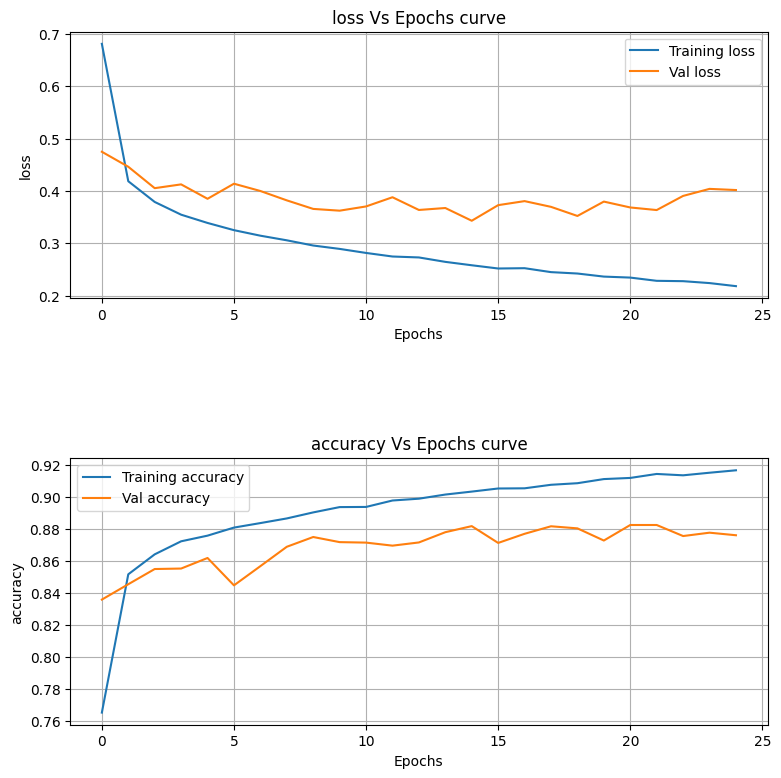

In [147]:
# Plot the loss curves
plot_loss_curves(model_2_history)

In [148]:
# Make predictions using the model
model_2_pred_probs = model_2.predict(test_data)
model_2_pred_probs

313/313 [==============================] - 1s 3ms/step


array([[1.2579914e-19, 4.5306962e-14, 3.7817624e-11, ..., 3.8935908e-05,
        2.8492443e-11, 9.9995744e-01],
       [1.0588097e-04, 2.2747830e-09, 9.9271518e-01, ..., 4.2712474e-22,
        2.2807458e-07, 9.6428289e-21],
       [3.2159037e-18, 1.0000000e+00, 2.5678187e-25, ..., 1.6760657e-37,
        4.2785588e-13, 0.0000000e+00],
       ...,
       [2.0549425e-10, 9.5833604e-16, 1.0494051e-19, ..., 2.2693457e-24,
        1.0000000e+00, 2.9777439e-33],
       [6.7885510e-11, 1.0000000e+00, 1.4101292e-15, ..., 1.1314441e-27,
        3.4575021e-09, 1.8468606e-30],
       [1.1885682e-21, 1.0860680e-18, 1.9436162e-16, ..., 1.9770834e-09,
        1.9756472e-09, 4.4637196e-09]], dtype=float32)

In [149]:
model_2_pred_probs[0], len(model_2_pred_probs[0])

(array([1.2579914e-19, 4.5306962e-14, 3.7817624e-11, 2.4687377e-11,
        1.6433468e-06, 1.9614001e-06, 1.5841260e-15, 3.8935908e-05,
        2.8492443e-11, 9.9995744e-01], dtype=float32),
 10)

In [150]:
# Convert the prediction probabilities into prediction labels
model_2_preds = model_2_pred_probs.argmax(axis = -1)
model_2_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

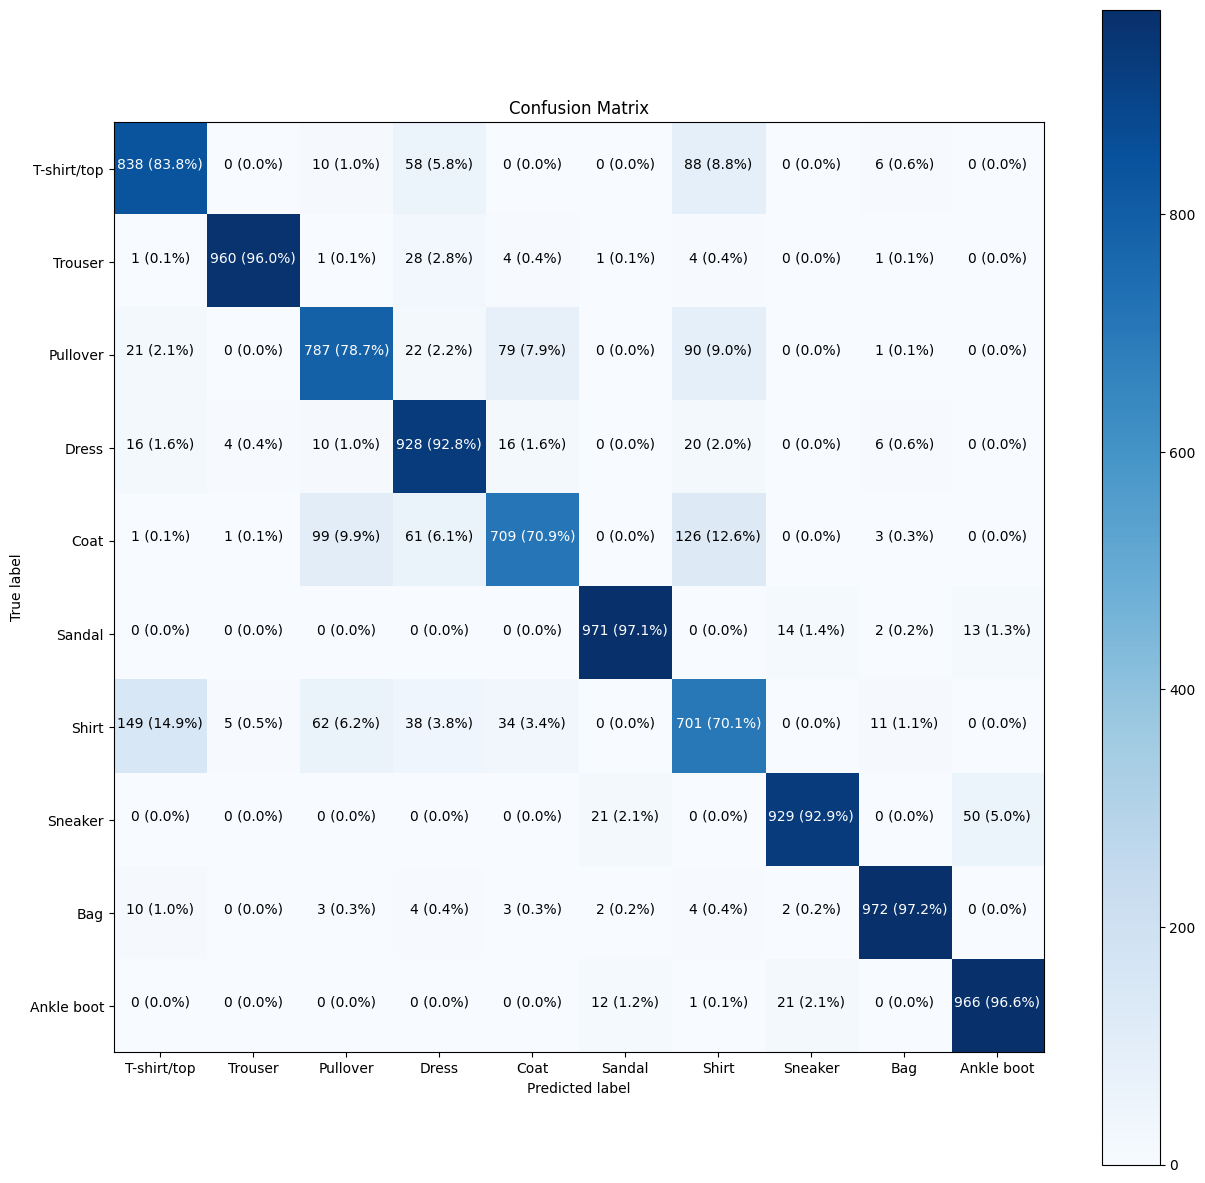

In [152]:
# Make the confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=model_2_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [153]:
print(classification_report(y_true = test_labels,
                      y_pred = model_2_preds,
                      target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.84      0.82      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.81      0.79      0.80      1000
       Dress       0.81      0.93      0.87      1000
        Coat       0.84      0.71      0.77      1000
      Sandal       0.96      0.97      0.97      1000
       Shirt       0.68      0.70      0.69      1000
     Sneaker       0.96      0.93      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



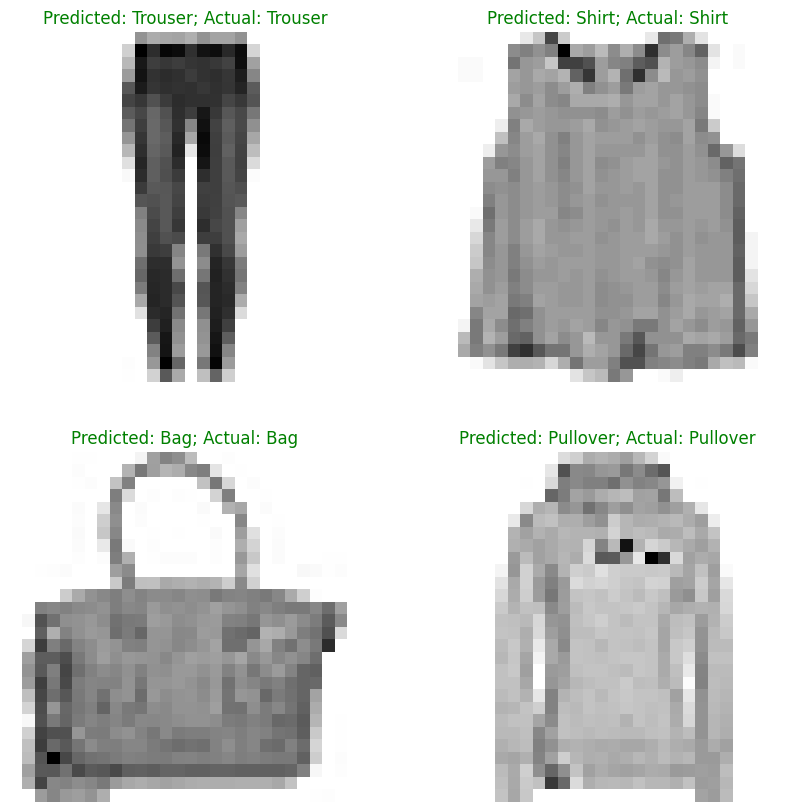

In [158]:
plot_pred_images(model_2_preds, test_data, test_labels, class_names)